In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# %pip install xlrd

In [48]:
df = pd.read_excel('archive/titanic3.xls')


In [49]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [50]:
df.shape

(1309, 14)

In [51]:
df.drop(['name', 'boat', 'body', 'home.dest'], axis = 1, inplace=True)

In [52]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S


In [53]:
df.shape

(1309, 10)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [55]:
df.isnull().sum()

pclass         0
survived       0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [56]:
columns = df.columns[df.isnull().any(axis = 0)]

In [57]:
columns

Index(['age', 'fare', 'cabin', 'embarked'], dtype='object')

In [58]:
print(type(df.mode()))
print(type(df['pclass'].mode()))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [59]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [60]:
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1309 non-null   float64
 8   cabin     1309 non-null   object 
 9   embarked  1309 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [62]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,28.699516,0.498854,0.385027,33.276193
std,0.837836,0.486055,13.097103,1.041658,0.865560,51.743584
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [63]:
x = df
y = df.pop('survived')

In [64]:
float_int_column = x.select_dtypes(include = ['float', 'int']).columns

In [65]:
categorical_columns = x.select_dtypes(include=['object']).columns
categorical_columns

Index(['sex', 'ticket', 'cabin', 'embarked'], dtype='object')

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

x[categorical_columns] = x[categorical_columns].astype('str').apply(le.fit_transform)

In [67]:
x.head(10)

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,29.0000,0,0,187,211.3375,43,2
1,1,1,0.9167,1,2,49,151.5500,79,2
2,1,0,2.0000,1,2,49,151.5500,79,2
3,1,1,30.0000,1,2,49,151.5500,79,2
4,1,0,25.0000,1,2,49,151.5500,79,2
5,1,1,48.0000,0,0,124,26.5500,149,2
6,1,0,63.0000,1,0,92,77.9583,145,2
7,1,1,39.0000,0,0,15,0.0000,15,2
8,1,0,53.0000,2,0,76,51.4792,61,2
9,1,1,71.0000,0,0,825,49.5042,80,0


In [68]:
type(categorical_columns)

pandas.core.indexes.base.Index

In [69]:
type(x[categorical_columns])

pandas.core.frame.DataFrame

In [70]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
x_encoded = ohe.fit_transform(x[categorical_columns])
x_encoded

c:\Users\ratan\Documents\ML\Machine Learning\env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [71]:
x.shape

(1309, 9)

In [72]:
# exclude columns with categorical data
x = x.drop(list(categorical_columns), axis=1)

In [73]:
x.head()

,pclass,age,sibsp,parch,fare
0,1,29.0000,0,0,211.3375
1,1,0.9167,1,2,151.5500
2,1,2.0000,1,2,151.5500
3,1,30.0000,1,2,151.5500
4,1,25.0000,1,2,151.5500


In [74]:
x_encoded_df = pd.DataFrame(x_encoded)
x = pd.concat((x_encoded_df, x), axis=1)


In [75]:
x.shape

(1309, 1125)

In [76]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,1115,1116,1117,1118,1119,pclass,age,sibsp,parch,fare
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,29.0000,0,0,211.3375
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,0.9167,1,2,151.5500
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,2.0000,1,2,151.5500
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,30.0000,1,2,151.5500
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,25.0000,1,2,151.5500


# Column names should be strings.

In [77]:
# x = x.iloc[:, 1:]

# alternative: x = x.drop(0, axis=1)
x.columns = x.columns.astype(str)
x = x.drop('0', axis=1)

In [78]:
x.head()

,1,2,3,4,5,6,7,8,9,10,...,1115,1116,1117,1118,1119,pclass,age,sibsp,parch,fare
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,29.0000,0,0,211.3375
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,0.9167,1,2,151.5500
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,2.0000,1,2,151.5500
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,30.0000,1,2,151.5500
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1,25.0000,1,2,151.5500


In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = 0.8)

In [80]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [81]:
print(type(float_int_column))
x_train[float_int_column] = scale.fit_transform(x_train[float_int_column])

<class 'pandas.core.indexes.base.Index'>


In [82]:
x_test[float_int_column] = scale.transform(x_test[float_int_column])

In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

In [84]:
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [85]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,1115,1116,1117,1118,1119,pclass,age,sibsp,parch,fare
1118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.835808,-0.302611,-0.478911,-0.455423,-0.504636
44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,-1.542157,0.951373,-0.478911,-0.455423,1.971571
1072,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.835808,-0.380984,-0.478911,-0.455423,-0.508386
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.835808,-0.851228,-0.478911,-0.455423,-0.507570
574,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.353174,0.010885,0.434422,-0.455423,-0.248848


In [86]:
classifier.predict(x_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [87]:
classifier.score(x_test, y_test)

0.816793893129771

In [88]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, classifier.predict(x_test))
cm

array([[150,  12],
       [ 36,  64]], dtype=int64)

<Axes: >

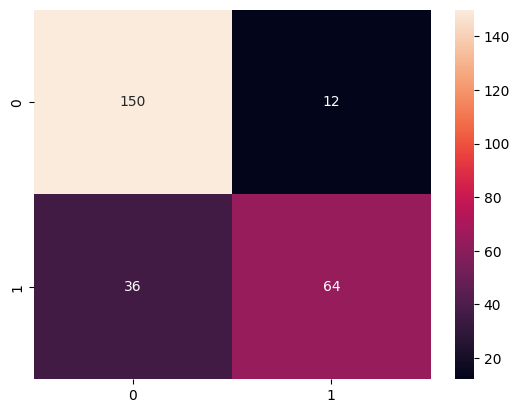

In [89]:
# data visualization
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')


In [90]:
graph = pd.DataFrame(cm, index=['Survived', 'Not Survived'], columns=['Survived', 'Not Survived'])
graph


,Survived,Not Survived
Survived,150,12
Not Survived,36,64
